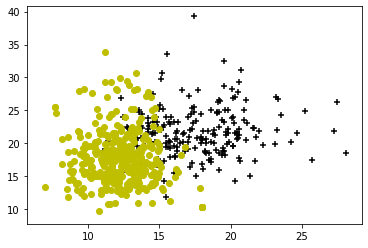

El valor de la funcion de coste es: [[0.69314718]]

El gradiente es: 
[[0.12206573]
 [0.45371479]
 [1.52044601]
 [2.30030516]]

Los thetas optimos son: [-6.4611058  -3.92657603  0.03355747  0.66189805]

El porcetaje de acierto en las predicciones por regresion logistica con lambda = 1 es: 90.20979020979021


In [1]:
import csv
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import scipy . optimize as opt
from sklearn.preprocessing import PolynomialFeatures
from scipy import optimize
from sklearn.model_selection import train_test_split

def carga_csv(filename) :
    valores = read_csv(filename, header=None).values
    return valores

datos = carga_csv("Data/wdbc.csv")
X = datos[:, 2:5]
X = X.astype(float)

y = datos[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

y = np.array(y == 'M').astype(int)
y = y.reshape(len(y), 1)

y_train = np.array(y_train == 'M').astype(int)
y_train = y_train.reshape(len(y_train), 1)

y_test = np.array(y_test == 'M').astype(int)
y_test = y_test.reshape(len(y_test), 1)

maligno = np.where(y == 1)
benigno = np.where(y == 0)
plt.scatter(X[maligno, 0],X[maligno,1],marker='+', c='k')
plt.scatter(X[benigno, 0],X[benigno,1],marker='o', c='y')

plt.show()


def sigmoid(z):
    return 1/(1+np.exp(-z))
    
def hipotesis(comp, x):
    return sigmoid(x.dot(comp))


def funcionCoste(comp, x, y, landa):
    comp = comp.reshape(-1, 1)
    matriz1 = np.log(hipotesis(comp, x))
    logaritmo1 = np.dot(matriz1.T,y)
    matriz2 = np.log(1-hipotesis(comp, x))
    logaritmo2 = np.dot(matriz2.T,(1-y))
    sum_reg = np.sum(comp**2)
    regularizacion = ((landa/(2*len(x)))*sum_reg)
    funcionCoste = logaritmo1 + logaritmo2
    return funcionCoste/(-len(x)) + regularizacion


def calcular_gradiente(theta,X, y, landa):
    theta = theta.copy()
    theta = theta.reshape(-1, 1) 
    m = len(y)
    prediction = hipotesis(theta, X)
    gradiente = (1/m)*(X.T.dot((prediction - y)))
    regularizacion = (landa/len(X))*theta
    return gradiente + regularizacion


def prediccion_porcentaje(X, y, optTheta):
    ejemplosCorrectos = 0
    for x in range(len(X)):
        prediccion = hipotesis(optTheta.T, X[x,:])
        if (prediccion >= 0.5):
            prediccion = 1
        if (prediccion < 0.5):
            prediccion = 0
        if(y[x] == prediccion):
            ejemplosCorrectos = ejemplosCorrectos + 1
    porcentaje = (ejemplosCorrectos*100)/len(X)
    return porcentaje
    


X_b = np.c_[np.ones((len(X_train),1)),X_train]
X_test_b = np.c_[np.ones((len(X_test),1)),X_test]
landa = 1

#FUNCIONCOSTE:

theta = np.zeros([len(X_b[0]), 1])
Z = funcionCoste(theta,X_b,y_train, landa)

print("El valor de la funcion de coste es: " + str(Z))

grad= calcular_gradiente(theta, X_b, y_train, landa)
print("\nEl gradiente es: \n" + str(grad))

#THETAS OPTIMOS:
result = opt.fmin_tnc(func = funcionCoste, x0 = theta, fprime= calcular_gradiente, args=(X_b, y_train, landa))
theta_opt = result[0]
print("\nLos thetas optimos son: " + str(theta_opt))


porcentaje = prediccion_porcentaje(X_test_b, y_test, theta_opt)

print("\nEl porcetaje de acierto en las predicciones por regresion logistica con lambda = " + str(landa) + " es: " + str(porcentaje))
